In [1]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce

# fig 2 gaussian
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
import networkx as nx



In [2]:
# adj_file = 'exemplos/points40_2d3.adj'
# xy_file = 'exemplos/points40_2d3.xy'

adj_file = 'exemplos/pert400+.adj'
xy_file = 'exemplos/pert400+.xy'

A = np.loadtxt(adj_file)
p = np.loadtxt(xy_file)

D = np.diag(np.sum(A,axis=0))
L = D - A

G=nx.from_numpy_matrix(A)



In [3]:
###########
# Graph Fourier of a Gaussian
###########
n = p.shape[0]
fs = np.zeros((n,1))
U = np.array([[1,0],[0,1]])
U = np.matrix(np.sqrt(2)*U)
D = np.matrix(np.array([[20,0],[0,20]]))
Di = D.I
V = reduce(np.dot,[U,Di,U.transpose()])
pc = 208
for i in range(0,n):
   x = p[i,:]-p[pc,:]
   e = reduce(np.dot,[x.transpose(),V,x])
   fs[i] = np.exp(-e) #+ np.random.normal(0, 0.1, 1)

gft = GFT(L)
gft.set_signal(fs)
fst = gft.gft()
ifs = gft.igft()

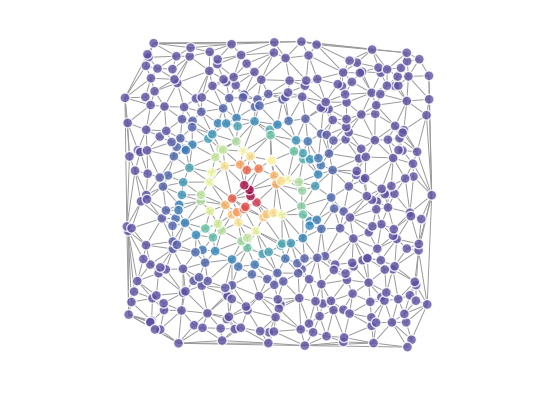

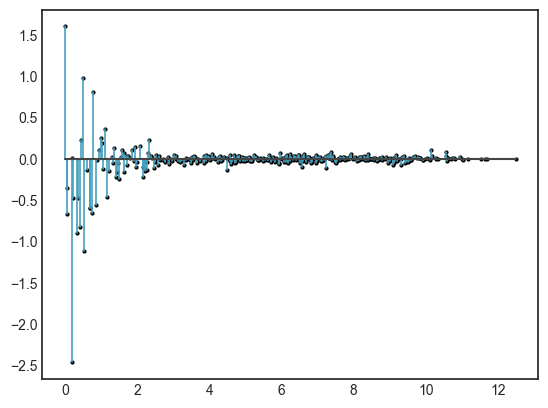

In [27]:

# cmap = ListedColormap(sns.color_palette('YlGnBu', 255)[::-1])
cmap = ListedColormap(sns.color_palette('Spectral_r', 255)[0:])
# cmap = sns.cubehelix_palette(as_cmap=True)

nodes = nx.draw_networkx_nodes(G, pos=p,node_color=fs, node_size=50, cmap=cmap)
nodes.set_edgecolor('#ffffff')
nodes.set_alpha(.8)
nx.draw_networkx_edges(G, pos=p,  edge_color="#999999", width=.7)
plt.gca().set_aspect('equal', 'datalim')
# plt.gca().grid()
plt.axis('off')
plt.savefig('gaussian_function.pdf',bbox_inches='tight')
plt.show()

sns.set_style("white")

S = gft.get_spec()
# pg.plot_specf(S,fst,1)
markerline, stemlines, baseline = plt.stem(S,fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', 'k', 'markersize',2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', 1.5) 
plt.savefig('gaussian_spectrum.pdf',bbox_inches='tight')
plt.show()
